In [1]:
from typing import List
from typing import Callable
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

colorPalette = ['#00A6B2','#FE6E61','#FF46DF', '#920096', '#FF9999']

In [2]:
sns.set_style('darkgrid')

### List Operations :

In [3]:
print("Python List Operations\n")

a = [1, 2, 3]
b = [4, 5, 6]

print(f"a + b : {a + b}\n")

try:
    print(a * b)
except:
    print(f"{a} * {b} has no meaning in python list\n----------------")

a = np.array([[1, 2], [3, 4]])

print(f"\na : {a}\nSum of axis 0 : {a.sum(axis=0)}\nSum of axis 1 : {a.sum(axis=1)}")

print("Numpy Array Operations\n")

a = [1, 2, 3]
b = [4, 5, 6]

a = np.array(a)
b = np.array(b)

print(f"a + b : {a+b}")
print(f"a * b : {a*b}\n")

Python List Operations

a + b : [1, 2, 3, 4, 5, 6]

[1, 2, 3] * [4, 5, 6] has no meaning in python list
----------------

a : [[1 2]
 [3 4]]
Sum of axis 0 : [4 6]
Sum of axis 1 : [3 7]
Numpy Array Operations

a + b : [5 7 9]
a * b : [ 4 10 18]



### Function in Python :

In [4]:
def square(x: np.ndarray) -> np.ndarray:
    return np.power(x, 2)


a = [1, 2, 3, 4, 5]

# print(square.__annotations__)

print(f"a = {a}\nf(a) = {square(a)}\nType of result [f(a)] : {type(square(a))}")


a = [1, 2, 3, 4, 5]
f(a) = [ 1  4  9 16 25]
Type of result [f(a)] : <class 'numpy.ndarray'>


### Callable 
&rarr; Give an alias to a callable function. To make it look like an object or a variable. <br>
&rarr; `Callable[[parameter types], return type]`

```Python
def some_function(int: x, float: y) -> float:
    return x*y

func_alias = Callable[[int, float], float]
some_array = List[func_alias]

some_array = [some_function]    # Will be treated as a variable.
```

### Chain Functions in Python :

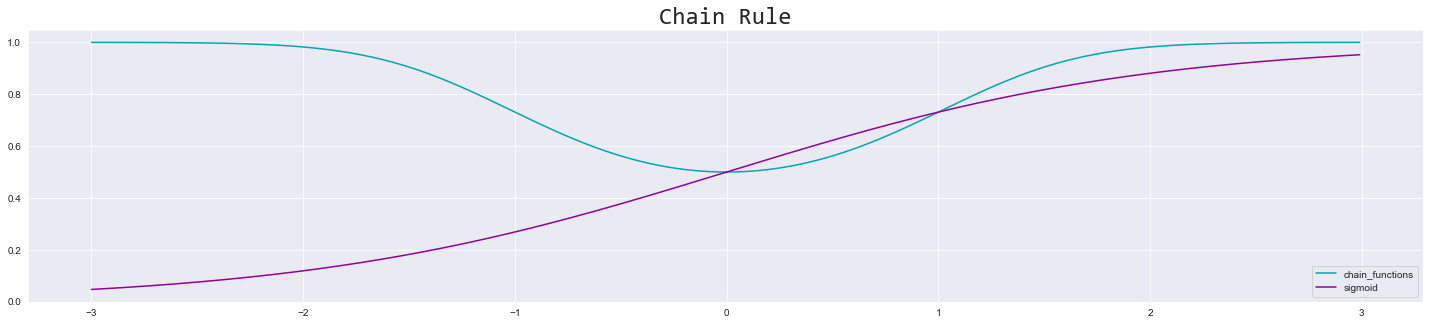

In [28]:
Array_Function = Callable[[np.ndarray], np.ndarray]
Chain = List[Array_Function]


def sigmoid(x: np.ndarray) -> np.ndarray:
    return 1 / (1 + np.exp(-x))


def square(x: np.ndarray) -> np.ndarray:
    return np.power(x, 2)


def chain_functions(chain: Chain, x: np.ndarray) -> np.ndarray:
    """Some Functions"""
    assert len(chain) == 2
    "Length of chain must be 2"

    f1 = chain[0]
    f2 = chain[1]

    return f2(f1(x))

plt.figure(figsize=(25, 5))

PLOT_RANGE = np.arange(-3, 3, 0.01)

chain_funcs = [square, sigmoid]

plt.plot(PLOT_RANGE, chain_functions(chain_funcs, PLOT_RANGE), color=colorPalette[0])
plt.plot(PLOT_RANGE, sigmoid(PLOT_RANGE), color=colorPalette[3])
# plt.plot(PLOT_RANGE, square(PLOT_RANGE), color=colorPalette[4])
plt.title("Chain Rule", fontname="Consolas", fontsize=24)
plt.legend(['chain_functions', 'sigmoid', 'square'])
plt.show()


### Derivative in Python

Function derivative annotations :  {'func': typing.Callable[[numpy.ndarray], numpy.ndarray], 'input_': <class 'numpy.ndarray'>, 'delta': <class 'float'>, 'return': <class 'numpy.ndarray'>}


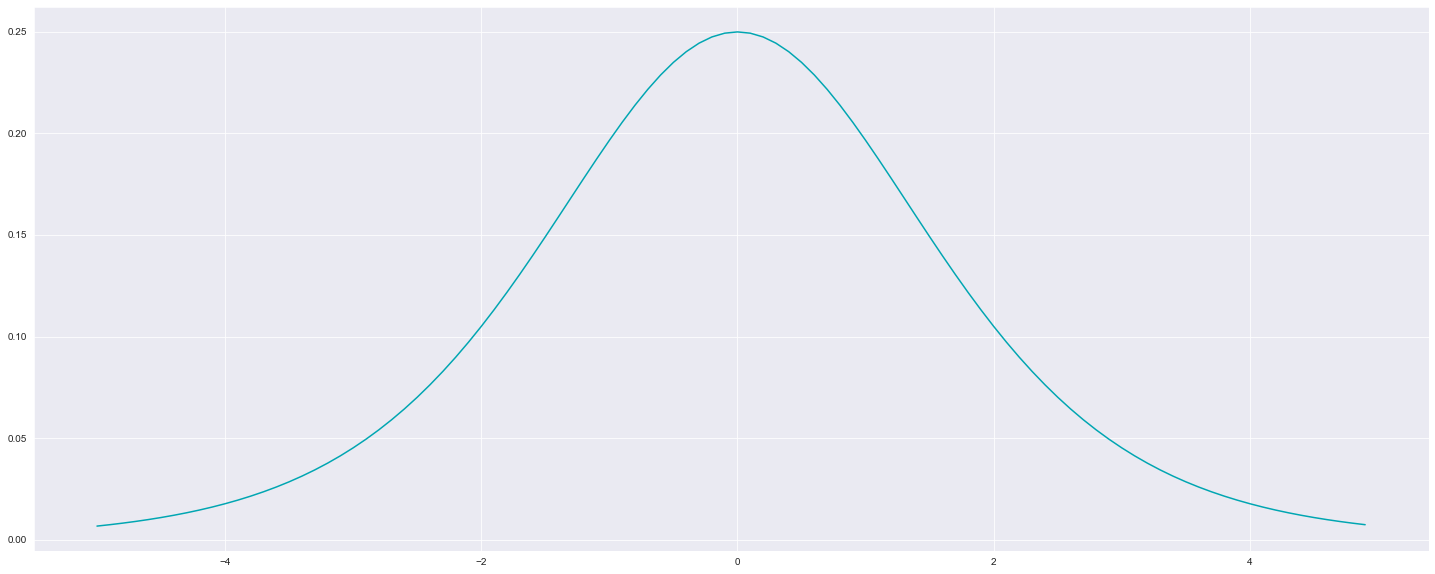

In [15]:
def derive(
    func: Callable[[np.ndarray], np.ndarray], input_: np.ndarray, delta: float = 0.001
) -> np.ndarray:
    return (func(input_ + delta) - func(input_ - delta)) / (2 * delta)


def sigmoid(x: np.ndarray) -> np.ndarray:
    return 1 / (1 + np.exp(-x))


print("Function derivative annotations : ", derive.__annotations__, end="\n")

func_alias = Callable[[np.ndarray], np.ndarray]
function = List[func_alias]

functions = [sigmoid]

plt.figure(figsize=(25,10))

PLOT_RANGE = np.arange(-5, 5, 0.1)

plt.plot(PLOT_RANGE, derive(functions[0], PLOT_RANGE), color=colorPalette[0])
plt.show()

### Derivative Chain Rule in Python

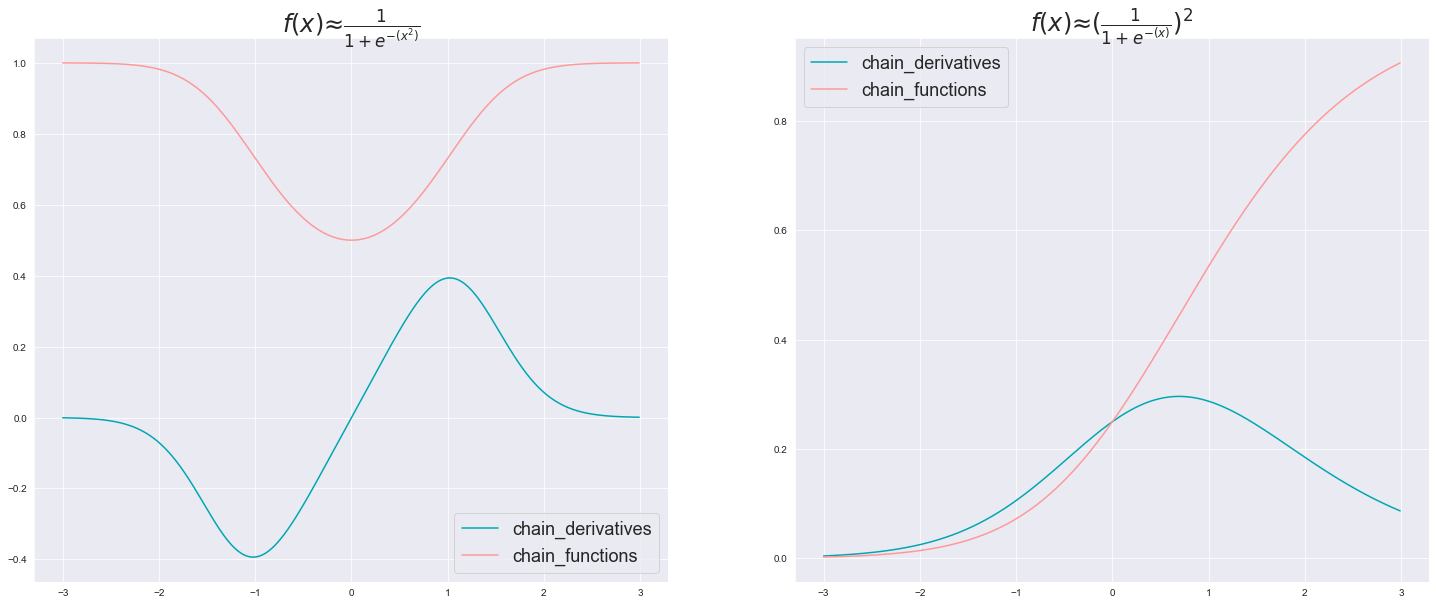

In [23]:
Array_Function = Callable[[np.ndarray], np.ndarray]
Chain = List[Array_Function]


def sigmoid(x: np.ndarray) -> np.ndarray:
    return 1 / (1 + np.exp(-x))


def square(x: np.ndarray) -> np.ndarray:
    return np.power(x, 2)


def derive(
    func: Callable[[np.ndarray], np.ndarray], input_: np.ndarray, delta: float = 0.001
) -> np.ndarray:
    return (func(input_ + delta) - func(input_ - delta)) / (2 * delta)


def chain_functions(chain: Chain, a: np.ndarray) -> np.ndarray:
    """Some Functions"""
    assert len(chain) == 2
    "Length of chain must be 2"

    f1 = chain[0]
    f2 = chain[1]

    return f2(f1(a))


def chain_derivatives(chain: Chain, input_range: np.ndarray) -> np.ndarray:

    assert len(chain) == 2, "Function requires 2 functions only"
    assert input_range.ndim == 1, "This function requires 1 dimensional input array"

    f1 = chain[0]
    f2 = chain[1]

    # df(g(x)) = df/du * dg/dx
    # f ==> f2
    # g ==> f1

    f1_of_x = f1(input_range)

    df1dx = derive(f1, input_range)
    df2du = derive(f2, f1_of_x)

    return df1dx * df2du


PLOT_RANGE = np.arange(-3, 3, 0.01)

chain_1 = [square, sigmoid]
chain_2 = [sigmoid, square]

fig, ax = plt.subplots(1,2, figsize=(25,10))

ax[0].plot(PLOT_RANGE, chain_derivatives(chain_1, PLOT_RANGE), color=colorPalette[0])
ax[0].plot(PLOT_RANGE, chain_functions(chain_1, PLOT_RANGE), color=colorPalette[4])
ax[0].set_title(r'$f(x) ≈ \frac{1}{1 + e^{-(x^2)}}$', fontsize=24)
ax[0].legend(["chain_derivatives", "chain_functions"], fontsize=18)

ax[1].plot(PLOT_RANGE, chain_derivatives(chain_2, PLOT_RANGE), color=colorPalette[0])
ax[1].plot(PLOT_RANGE, chain_functions(chain_2, PLOT_RANGE), color=colorPalette[4])
ax[1].set_title(r'$f(x) ≈ (\frac{1}{1 + e^{-(x)}})^2$', fontsize=24)
ax[1].legend(["chain_derivatives", "chain_functions"], fontsize=18)
plt.show()

### Functions W/ Multiple Inputs :